SELECT ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS FROM mh.iesrais;

In [119]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import graphviz
from google.cloud import bigquery
import pandas as pd

In [120]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Pegando os dados após o cruzamento com o CNPJ

In [121]:
file_name = "Cr_BSI_1_2"
#file_name = "CrMat_1_2"
#file_name = "CrEngProd_1_2"

In [122]:
data = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name+".xlsx")

In [123]:
data

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,grade_logic,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria
0,0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,ADMINISTRAÇÃO FINANCEIRA,10.0,...,4.1,Evadido,***398607**,8839860789,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1,1061208,102,20131210002,não-baixa-renda,LUCIANO DE MORAES PETERSEN,2016.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,8.6,...,4.1,Evadido,***874547**,5987454751,2016-06-24,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
2,1061224,118,20131210003,não-baixa-renda,MAX MORAIS DOS SANTOS,2017.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,4.1,Evadido,***559497**,13255949700,2017-07-04,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,4.1,Evadido,***103447**,12410344780,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,4.1,Concluido,***013477**,15501347792,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,7714755,12963,20231210004,não-baixa-renda,JOAO GABRIEL COSTA DIAS,2023.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,4.1,Evadido,***313487**,13631348762,2023-09-18,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
358,7714756,12964,20231210006,não-baixa-renda,JOAO VITOR DE MELO RAMOS,2023.0,cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,4.1,Evadido,***010167**,16201016708,2023-11-21,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
359,7714762,12970,20231210022,não-baixa-renda,EDUARDO DA SILVA LIMA,2023.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,8.9,...,4.1,Evadido,***064117**,15706411700,2023-08-09,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário
360,7714763,12971,20231210029,baixa-renda,MARCUS VINICIUS GOMES DOS SANTOS,2023.0,cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,8.5,...,4.1,Evadido,***691727**,15169172788,2023-08-08,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário


In [124]:
# prompt: Substitua valores de data["NOME_CURSO"] que sejam "Sistemas de Informação - Bacharelado - Turno Integral (V/N)" por "Sistemas de Informações"

data["NOME_CURSO"] = data["NOME_CURSO"].replace("Sistemas de Informação - Bacharelado - Turno Integral (V/N)", "Sistemas de Informação")
data["NOME_CURSO"] = data["NOME_CURSO"].replace("Matemática - Licenciatura - Turno Integral (Vepsertino/Noturno)", "Matemática")
data["NOME_CURSO"] = data["NOME_CURSO"].replace("Engenharia de Produção - Bac.- Hab. Prod. Cultura - Turno Noturno", "Engenharia de Produção")


In [125]:
# prompt: Pegue as colunas cujo NOME_PESSOA =" EDUARDO BRAGA AMARAL DE BRITO"

data[data["NOME_PESSOA"] == "EDUARDO BRAGA AMARAL DE BRITO"]


,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,grade_logic,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,4.1,Evadido,***103447**,12410344780,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário


# Pegando os dados da RAIS

In [126]:
rais = pd.read_csv("/content/gdrive/My Drive/dados_mestrado/RAIS2021.csv", sep=';')


In [127]:
rais

,ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS
0,9,2,9,2161.82,15578274781,THAMARA RODRIGUES DE OLIVEIRA ...,2021
1,9,2,2,3301.12,13894969709,JULIA SANTANA DE AGUIAR ...,2021
2,9,2,2,6853.60,12049617780,YASMIM MADEIRO PASSARELLO REIS ...,2021
3,9,2,8,33.30,51625890206,IONAR IOLLANDA RIBEIRO DA SILVA ...,2021
4,9,2,8,97.97,11791348777,BRUNA PONTES DA SILVEIRA ...,2021
...,...,...,...,...,...,...,...
221570,9,2,99,2671.90,8100466793,ANNA VALQUIRIA LOPES MAGALHAES ...,2021
221571,9,1,4,3803.29,8891749702,MAXIMILIANO DE SOUZA ...,2021
221572,9,2,2,0.00,13440033708,FERNANDA SIQUEIRA LIMA ...,2021
221573,9,2,99,23429.70,11043507779,REBECA SAMPAIO LIMA E SILVA ...,2021


In [128]:
rais[rais["NOME"] == "EDUARDO BRAGA AMARAL DE BRITO"]


,ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS
31901,9,1,2,90.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2020
63616,9,1,2,7360.50,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2019
95318,9,1,2,24.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2018
154361,9,1,2,3218.66,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2016
186367,9,1,2,2964.87,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2015


In [129]:
# prompt: Junte data com rais através de data.NOME_PESSOA = rais.NOME e data_CPF_MASCARA = rais.CPF

merged_data = pd.merge(data, rais, left_on=['NOME_PESSOA', 'CPF_MASCARA'], right_on=['NOME', 'CPF'])
merged_data

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
0,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,90.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2020
1,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,7360.50,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2019
2,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,24.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2018
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,3218.66,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2016
4,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,2964.87,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,7714465,12883,20222210002,não-baixa-renda,CLAUDIO LUIZ PAIVA VIEIRA,2023.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,19.00,13898594793,CLAUDIO LUIZ PAIVA VIEIRA,2018
711,7714736,12944,20222210037,não-baixa-renda,PEDRO HENRIQUE XAVIER MACHADO,NaN,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,3.7,...,Não é empresário,Não é empresário,Não é empresário,6,1,99,11.99,16398570790,PEDRO HENRIQUE XAVIER MACHADO,2020
712,7714736,12944,20222210037,não-baixa-renda,PEDRO HENRIQUE XAVIER MACHADO,NaN,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,3.7,...,Não é empresário,Não é empresário,Não é empresário,6,1,99,10.44,16398570790,PEDRO HENRIQUE XAVIER MACHADO,2019
713,7714769,12977,20232210030,não-baixa-renda,IZADORA DE QUEIROS SILVA,NaN,cotistas,Sistemas de Informação,Algoritmos e Programação,0.0,...,Não é empresário,Não é empresário,Não é empresário,7,2,8,9.80,13017723640,IZADORA DE QUEIROS SILVA,2017


In [130]:
#merged_data['DT_EVASAO'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')
#merged_data['ANORAIS'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')
#merged_data['ANO_INGRESSO'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')


In [131]:
# prompt: Filtre merged_data por ANOSRAIS > ANO_INGRESSO ou ANOSRAIS < DT_EVASAO

merged_data_employees = merged_data[(merged_data['ANORAIS'] > merged_data['ANO_INGRESSO']) & (merged_data['ANORAIS'] < merged_data['year4'])]
merged_data_employees


,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
1,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,7360.50,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2019
2,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,24.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2018
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,3218.66,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2016
4,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,2964.87,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2015
33,1061944,628,20131210016,não-baixa-renda,PRISCILA DE OLIVEIRA CORREIA,2016.0,nao-cotistas,Sistemas de Informação,Atividades Curriculares de Extensão-1,10.00,...,Não é empresário,Não é empresário,Não é empresário,7,2,8,911.20,10141920483,PRISCILA DE OLIVEIRA CORREIA,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,6288795,11157,20181210028,não-baixa-renda,ALLAN CHRISTIAN DE FREITAS BORGES,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,9.71,...,Não é empresário,Não é empresário,Não é empresário,6,1,2,5.77,18572187790,ALLAN CHRISTIAN DE FREITAS BORGES,2019
659,6289066,11428,20182210001,não-baixa-renda,CAIO RODRIGUES DIAS DE JESUS,2023.0,nao-cotistas,Sistemas de Informação,ANÁLISE DE ALGORITMOS,6.10,...,Fundou uma empresa antes da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa durante a graduação,9,1,2,40.00,15819488750,CAIO RODRIGUES DIAS DE JESUS,2020
660,6289066,11428,20182210001,não-baixa-renda,CAIO RODRIGUES DIAS DE JESUS,2023.0,nao-cotistas,Sistemas de Informação,ANÁLISE DE ALGORITMOS,6.10,...,Fundou uma empresa antes da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa durante a graduação,9,1,2,40.00,15819488750,CAIO RODRIGUES DIAS DE JESUS,2019
668,7703691,11913,20182210029,não-baixa-renda,LUKAS DE JESUS DE FREITAS,2023.0,cotistas,Sistemas de Informação,FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO,8.00,...,Não é empresário,Não é empresário,Não é empresário,7,1,8,9.35,13864396735,LUKAS DE JESUS DE FREITAS,2019


In [132]:
# prompt: Crie merged_data_employees_unicos que é formado por merged_data_employees de valores únicos de NOME_PESSOA

merged_data_employees_unicos = merged_data_employees.drop_duplicates(subset="NOME_PESSOA")
merged_data_employees_unicos

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
1,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,7360.50,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2019
33,1061944,628,20131210016,não-baixa-renda,PRISCILA DE OLIVEIRA CORREIA,2016.0,nao-cotistas,Sistemas de Informação,Atividades Curriculares de Extensão-1,10.00,...,Não é empresário,Não é empresário,Não é empresário,7,2,8,911.20,10141920483,PRISCILA DE OLIVEIRA CORREIA,2015
37,1061990,674,20131210019,não-baixa-renda,PAULA DIAS DE FIGUEIREDO,2022.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,Não é empresário,Não é empresário,Não é empresário,6,2,4,557.21,16659528733,PAULA DIAS DE FIGUEIREDO,2015
74,1219946,1220,20131210033,não-baixa-renda,IGOR BALTEIRO PEREIRA DE CAMPOS,2018.0,cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL II,10.00,...,Não é empresário,Não é empresário,Não é empresário,7,1,99,2175.17,12347023713,IGOR BALTEIRO PEREIRA DE CAMPOS,2015
88,1220337,1611,20131210038,não-baixa-renda,CIBELE POUBEL PORTELLA,2019.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.40,...,Não é empresário,Não é empresário,Não é empresário,7,2,99,2175.17,14884779738,CIBELE POUBEL PORTELLA,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,6288531,10893,20181210014,não-baixa-renda,RAFAEL MOTA DE SOUZA,2023.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,9.44,...,Não é empresário,Não é empresário,Não é empresário,9,1,8,22.24,18840614788,RAFAEL MOTA DE SOUZA,2020
644,6288795,11157,20181210028,não-baixa-renda,ALLAN CHRISTIAN DE FREITAS BORGES,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,9.71,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,35.00,18572187790,ALLAN CHRISTIAN DE FREITAS BORGES,2020
659,6289066,11428,20182210001,não-baixa-renda,CAIO RODRIGUES DIAS DE JESUS,2023.0,nao-cotistas,Sistemas de Informação,ANÁLISE DE ALGORITMOS,6.10,...,Fundou uma empresa antes da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa durante a graduação,9,1,2,40.00,15819488750,CAIO RODRIGUES DIAS DE JESUS,2020
668,7703691,11913,20182210029,não-baixa-renda,LUKAS DE JESUS DE FREITAS,2023.0,cotistas,Sistemas de Informação,FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO,8.00,...,Não é empresário,Não é empresário,Não é empresário,7,1,8,9.35,13864396735,LUKAS DE JESUS DE FREITAS,2019


In [133]:
# Extraia os nomes dos empregados em um conjunto para uma busca mais rápida
employee_names = set(merged_data_employees_unicos['NOME_PESSOA'])

# Crie a nova coluna `employee_student` em `data`
data['employee_student'] = np.where(data['NOME_PESSOA'].isin(employee_names),
                                    'employee student',
                                    'non-employee student')

# Exibir os primeiros registros para verificação
data.head()


,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student
0,0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.0,nao-cotistas,Sistemas de Informação,ADMINISTRAÇÃO FINANCEIRA,10.0,...,Evadido,***398607**,8839860789,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação,non-employee student
1,1061208,102,20131210002,não-baixa-renda,LUCIANO DE MORAES PETERSEN,2016.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.6,...,Evadido,***874547**,5987454751,2016-06-24,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student
2,1061224,118,20131210003,não-baixa-renda,MAX MORAIS DOS SANTOS,2017.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Evadido,***559497**,13255949700,2017-07-04,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,Evadido,***103447**,12410344780,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,employee student
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,Concluido,***013477**,15501347792,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student


<Axes: xlabel='count', ylabel='employee_student'>

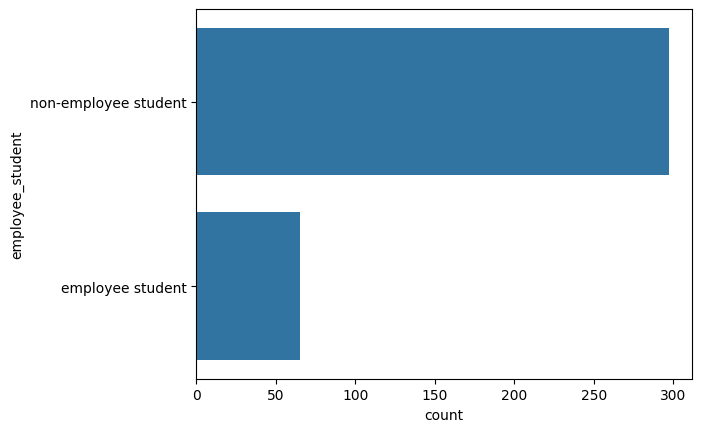

In [134]:
# prompt: Gere um gráfico de barras horizontais de data['employee_student']

sns.countplot(y="employee_student", data=data)


# Bolsistas

In [135]:
bolsistas = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/Bolsistas_ccet.xlsx")

In [136]:
bolsistas

,DT_INICIO,DT_TERMINO,MATR_BOLSISTA,NOME_BOLSISTA,COD_BOLSA,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO
0,01/04/2015,31/03/2016,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2015
1,01/04/2016,31/08/2016,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2016
2,01/09/2017,31/03/2018,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2017
3,01/12/2023,31/10/2024,20202230019,ALEXANDRE CARDOSO PAULINO,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Ativo,300.0,Valor,2023
4,01/05/2023,30/04/2024,20221230022,ALEXSANDRA JESSICA SOARES DE LIMA,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,250.0,Valor,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,01/04/2019,20/05/2019,20181220015,TOMAS DE MOURA,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2019
1350,01/02/2019,31/12/2019,20171210012,VICTOR HUGO SOUZA WIRZ,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2019
1351,01/02/2021,31/12/2021,20181230027,VICTOR PINHEIRO DO NASCIMENTO,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2021
1352,01/03/2017,31/12/2017,20152210031,VINICIUS MARQUES ZAMITH,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Sistemas de Informação - Bacharelado - Turno I...,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2017


In [137]:
# prompt: Printe os DESCR_BOLSA únicos

print(bolsistas['DESCR_BOLSA'].unique())


['Auxilio Alimentação' 'Auxílio Moradia' 'Bolsa de Incentivo Acadêmico'
 'Bolsa Incentivo Acadêmico + Auxilio Alimentação'
 'Bolsa de Iniciação Científica  da UNIRIO nas Ações Afirmativas'
 'Bolsa de Iniciação Científica da UNIRIO' 'MONITORIA DE GRADUAÇÃO'
 'Bolsistas da Incubadora PET/UNIRIO'
 'Programa Institucional de Bolsas de Cultura'
 'Programa Institucional de Bolsas de Extensão'
 'Programa Institucional de Iniciação Científica'
 'Programa de Iniciação Científica nas Ações Afirmativas'
 'PROGRAMA INSTITUCIONAL DE BOLSA DE INICIAÇÃO A DOCÊNCIA'
 'Programa de Acompanhamento de Discente de Graduação'
 'Programa de de Tutoria Especial da UNIRIO']


In [138]:
import pandas as pd

# Supondo que bolsistas é um DataFrame pandas
bolsas_academicas = [
    'Bolsa de Iniciação Científica da UNIRIO nas Ações Afirmativas',
    'Bolsa de Iniciação Científica da UNIRIO',
    'MONITORIA DE GRADUAÇÃO',
    'Bolsistas da Incubadora PET/UNIRIO',
    'Programa Institucional de Bolsas de Cultura',
    'Programa Institucional de Bolsas de Extensão',
    'Programa Institucional de Iniciação Científica',
    'Programa de Iniciação Científica nas Ações Afirmativas',
    'PROGRAMA INSTITUCIONAL DE BOLSA DE INICIAÇÃO A DOCÊNCIA',
    'Programa de Acompanhamento de Discente de Graduação',
    'Programa de de Tutoria Especial da UNIRIO'
]

bolsas_sociais = [
    'Auxilio Alimentação',
    'Auxílio Moradia',
    'Bolsa de Incentivo Acadêmico',
    'Bolsa Incentivo Acadêmico + Auxilio Alimentação'
]

# Função para classificar as bolsas
def classificar_bolsa(bolsa):
    if bolsa in bolsas_academicas:
        return 'bolsa acadêmica'
    elif bolsa in bolsas_sociais:
        return 'bolsa social'
    else:
        return 'não classificada'

# Criando a nova coluna com a classificação
bolsistas['tipo_bolsa'] = bolsistas['DESCR_BOLSA'].apply(classificar_bolsa)

# Exibir o DataFrame com a nova coluna
print(bolsistas.head())


    DT_INICIO  DT_TERMINO  MATR_BOLSISTA                      NOME_BOLSISTA  \
0  01/04/2015  31/03/2016    20102210001        Aline Sales da Silva Guedes   
1  01/04/2016  31/08/2016    20102210001        Aline Sales da Silva Guedes   
2  01/09/2017  31/03/2018    20102210001        Aline Sales da Silva Guedes   
3  01/12/2023  31/10/2024    20202230019          ALEXANDRE CARDOSO PAULINO   
4  01/05/2023  30/04/2024    20221230022  ALEXSANDRA JESSICA SOARES DE LIMA   

  COD_BOLSA          DESCR_BOLSA LOTACAO  \
0        AA  Auxilio Alimentação   1.00.   
1        AA  Auxilio Alimentação   1.00.   
2        AA  Auxilio Alimentação   1.00.   
3        AA  Auxilio Alimentação   1.00.   
4        AA  Auxilio Alimentação   1.00.   

                                       NOME_UNIDADE  \
0  Universidade Federal do Estado do Rio de Janeiro   
1  Universidade Federal do Estado do Rio de Janeiro   
2  Universidade Federal do Estado do Rio de Janeiro   
3  Universidade Federal do Estado do Rio

In [139]:
merged_data = pd.merge(data, bolsistas, left_on=['NOME_PESSOA'], right_on=['NOME_BOLSISTA'])
merged_data

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO_y,tipo_bolsa
0,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
1,1780771,3391,20141210001,não-baixa-renda,LUCAS DE ALMEIDA LINS,2018.0,nao-cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
2,1780771,3391,20141210001,não-baixa-renda,LUCAS DE ALMEIDA LINS,2018.0,nao-cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
3,1780771,3391,20141210001,não-baixa-renda,LUCAS DE ALMEIDA LINS,2018.0,nao-cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Matemática,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
4,1780858,3478,20141210005,não-baixa-renda,FILIPE ESTEVES GONÇALVES,2018.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.5,...,Bolsa de Iniciação Científica da UNIRIO,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,7706289,12687,20211210014,não-baixa-renda,AMANDA DE OLIVEIRA MANJO,NaN,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,Programa de Acompanhamento de Discente de Grad...,1.30.,Pró-Reitoria de Graduação,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Ativo,700.0,Valor,2024,bolsa acadêmica
222,7714419,12837,20221210015,não-baixa-renda,LUIZA CASTRO BARROSO,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2023,bolsa acadêmica
223,7714447,12865,20221210035,não-baixa-renda,ARIEL MENEZES DOS REIS,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.2,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,750.0,Valor,2022,bolsa social
224,7714459,12877,20221210036,não-baixa-renda,MILTON SALGADO LEANDRO,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,750.0,Valor,2022,bolsa social


In [140]:
merged_data_bolsistas_unicos = merged_data .drop_duplicates(subset="NOME_PESSOA")
merged_data_bolsistas_unicos

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO_y,tipo_bolsa
0,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
1,1780771,3391,20141210001,não-baixa-renda,LUCAS DE ALMEIDA LINS,2018.0,nao-cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
4,1780858,3478,20141210005,não-baixa-renda,FILIPE ESTEVES GONÇALVES,2018.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.5,...,Bolsa de Iniciação Científica da UNIRIO,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
5,1780920,3540,20141210007,não-baixa-renda,LORENNA GIANNINI ALVES MOREIRA,2014.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,Bolsa de Iniciação Científica da UNIRIO,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
8,1780990,3610,20141210009,não-baixa-renda,BIANCA RODRIGUES TEIXEIRA,2017.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,9.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2016,bolsa acadêmica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7706289,12687,20211210014,não-baixa-renda,AMANDA DE OLIVEIRA MANJO,NaN,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,700.0,Valor,2021,bolsa social
222,7714419,12837,20221210015,não-baixa-renda,LUIZA CASTRO BARROSO,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Informática Aplicada,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2023,bolsa acadêmica
223,7714447,12865,20221210035,não-baixa-renda,ARIEL MENEZES DOS REIS,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.2,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,750.0,Valor,2022,bolsa social
224,7714459,12877,20221210036,não-baixa-renda,MILTON SALGADO LEANDRO,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,750.0,Valor,2022,bolsa social


In [141]:
# Extraia os nomes dos bolsistas em um conjunto para uma busca mais rápida
bolsistas_names = set(merged_data_bolsistas_unicos['NOME_PESSOA'])

data['bolsista'] = np.where(data['NOME_PESSOA'].isin(bolsistas_names),
                                    'bolsista',
                                    'naobolsista')

# Realize o merge entre `data` e `merged_data_bolsistas_unicos` com base no nome da pessoa
data = data.merge(merged_data_bolsistas_unicos[['NOME_PESSOA', 'tipo_bolsa']],
                  on='NOME_PESSOA',
                  how='left')

# Preencha as linhas sem correspondência com 'naobolsista' na coluna `tipo_bolsa`
data['tipo_bolsa'] = np.where(data['tipo_bolsa'].isna(), 'naobolsista', data['tipo_bolsa'])

# Exibir os primeiros registros para verificação
data.head()

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa
0,0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.0,nao-cotistas,Sistemas de Informação,ADMINISTRAÇÃO FINANCEIRA,10.0,...,8839860789,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação,non-employee student,naobolsista,naobolsista
1,1061208,102,20131210002,não-baixa-renda,LUCIANO DE MORAES PETERSEN,2016.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.6,...,5987454751,2016-06-24,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
2,1061224,118,20131210003,não-baixa-renda,MAX MORAIS DOS SANTOS,2017.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,13255949700,2017-07-04,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,12410344780,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,employee student,naobolsista,naobolsista
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,15501347792,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica


In [142]:
# prompt: printe data onde data['bolsista'] seja 'bolsista'

data[data['bolsista'] == 'bolsista']


,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,15501347792,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
67,1780771,3391,20141210001,não-baixa-renda,LUCAS DE ALMEIDA LINS,2018.0,nao-cotistas,Sistemas de Informação,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,...,5794163720,2018-09-17,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
71,1780858,3478,20141210005,não-baixa-renda,FILIPE ESTEVES GONÇALVES,2018.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.5,...,12506945741,2019-04-11,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
73,1780920,3540,20141210007,não-baixa-renda,LORENNA GIANNINI ALVES MOREIRA,2014.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,10384754651,2014-02-11,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
75,1780990,3610,20141210009,não-baixa-renda,BIANCA RODRIGUES TEIXEIRA,2017.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,9.0,...,16602037757,2018-03-23,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação,non-employee student,bolsista,bolsa acadêmica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,7706289,12687,20211210014,não-baixa-renda,AMANDA DE OLIVEIRA MANJO,NaN,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,18975980766,2021-06-07,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa social
342,7714419,12837,20221210015,não-baixa-renda,LUIZA CASTRO BARROSO,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,19806421760,2023-08-14,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
347,7714447,12865,20221210035,não-baixa-renda,ARIEL MENEZES DOS REIS,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.2,...,17364283730,2022-04-28,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa social
348,7714459,12877,20221210036,não-baixa-renda,MILTON SALGADO LEANDRO,2022.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.0,...,12281165710,2022-09-06,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa social


# PCD

In [143]:
pcd = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/PCD.xlsx")

pcd

,CODIGO_CURSO,CURSO,MATRICULA,NOME,SEMESTRE_INGRESSO,ANO_INGRESSO,FORMA_INGRESSO,DATA_INGRESSO,FORMA_EVASAO,DATA_SAIDA,ANO_EVASAO,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO,DEFICIENCIA
0,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20221220023,ANA CAROLINA SANTOS BRANCO MAGALHAES COSTA,1°. semestre,2022,"SISU Escola Publica até 1,5 S.M.",13/04/2022,SEM EVASÃO,NaN,NaN,NaN,29/10/1997,Brasileira,RIO DE JANEIRO,F,NÃO IDENTIFICADO
1,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20181220012,JEAN RODRIGUES,1°. semestre,2018,"SISU Escola Publica, Indep de Renda: Preto, Pa...",07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA
2,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20181220012,JEAN RODRIGUES,1°. semestre,2018,"SISU Escola Publica, Indep de Renda: Preto, Pa...",07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA
3,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20162220003,LUIZ FELIPPE LISBOA MARINS DEL BOSCO,2°. semestre,2016,"SISU Escola Pública, Indep. de Renda : Preto e...",13/06/2016,DESISTÊNCIA SISU,2016-06-13,2016.0,2°. semestre,15/11/1998,NaN,NaN,M,DEFICIÊNCIA AUDITIVA
4,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20212220004,MARIA CECILIA DIAS DE AZEVEDO FURTADO,2°. semestre,2021,"SISU Escola Publica até 1,5 S.M.",08/10/2021,DESISTÊNCIA SISU,2021-11-08,2021.0,2°. semestre,08/02/2003,NaN,NaN,F,NÃO IDENTIFICADO
5,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20171220009,NATASHA PORTO BOMFIM,1°. semestre,2017,SISU Escola Publica - Indep. de Renda,06/02/2017,CAN - CANCELAMENTO GERAL DO CURSO,2020-03-06,2020.0,1°. semestre,17/06/1992,Brasileira,RIO DE JANEIRO,F,BAIXA VISÃO E VISÃO MONOCULAR
6,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20192220007,NILÇA DOS SANTOS CORREA DE SA,2°. semestre,2019,"SISU Escola Publica até 1,5 S.M.",11/07/2019,SEM EVASÃO,NaN,NaN,NaN,25/07/1996,Brasileira,CABO FRIO,F,CEGUEIRA
7,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20192220007,NILÇA DOS SANTOS CORREA DE SA,2°. semestre,2019,"SISU Escola Publica até 1,5 S.M.",11/07/2019,SEM EVASÃO,NaN,NaN,NaN,25/07/1996,Brasileira,CABO FRIO,F,CEGUEIRA
8,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20172220025,PAULO JOSE WACCANI ZAGUI,2°. semestre,2017,"SISU Escola Publica até 1,5 S.M.",10/08/2017,SEM EVASÃO,NaN,NaN,NaN,17/10/1976,Brasileira,RIO DE JANEIRO,M,SURDEZ
9,601TRI,MATEMÁTICA - LICENCIATURA,11216010015,ALMIR FERREIRA GOMES,2°. semestre,2011,VE - Vestibular,01/08/2011,ABA - ABANDONO DO CURSO,2015-06-20,2015.0,1°. semestre,10/08/1959,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA FÍSICA


In [144]:
merged_data = pd.merge(data, pcd, left_on=['NOME_PESSOA'], right_on=['NOME'])
merged_data

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO_x,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DATA_INGRESSO,FORMA_EVASAO_y,DATA_SAIDA,ANO_EVASAO_y,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO_y,DEFICIENCIA
0,2039015,4085,20141210020,não-baixa-renda,MARCEL AREAS DE ALMEIDA FILHO,2018.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.8,...,17/01/2014,ABA - ABANDONO DO CURSO,2018-10-18,2018.0,2°. semestre,06/03/1995,Brasileira,RIO DE JANEIRO,M,BAIXA VISÃO E VISÃO MONOCULAR
1,3447478,8062,20161210026,não-baixa-renda,MICHEL DAVI BUSQUET DE SOUSA,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.2,...,11/03/2016,ABA - ABANDONO DO CURSO,2023-11-23,2023.0,2°. semestre,08/08/1984,Brasileira,NOVA IGUAÇU,M,BAIXA VISÃO E VISÃO MONOCULAR
2,7703789,12011,20191210009,não-baixa-renda,LUCAS FERNANDES PEDROSA DE OLIVEIRA,2022.0,nao-cotistas,Sistemas de Informação,Álgebra Linear,10.0,...,31/01/2019,CON - CURSO CONCLUÍDO,2022-11-09,2022.0,2°. semestre,31/07/1995,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA


In [145]:
merged_data_pcd_unicos = merged_data .drop_duplicates(subset="NOME_PESSOA")
merged_data_pcd_unicos

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO_x,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DATA_INGRESSO,FORMA_EVASAO_y,DATA_SAIDA,ANO_EVASAO_y,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO_y,DEFICIENCIA
0,2039015,4085,20141210020,não-baixa-renda,MARCEL AREAS DE ALMEIDA FILHO,2018.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.8,...,17/01/2014,ABA - ABANDONO DO CURSO,2018-10-18,2018.0,2°. semestre,06/03/1995,Brasileira,RIO DE JANEIRO,M,BAIXA VISÃO E VISÃO MONOCULAR
1,3447478,8062,20161210026,não-baixa-renda,MICHEL DAVI BUSQUET DE SOUSA,2023.0,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.2,...,11/03/2016,ABA - ABANDONO DO CURSO,2023-11-23,2023.0,2°. semestre,08/08/1984,Brasileira,NOVA IGUAÇU,M,BAIXA VISÃO E VISÃO MONOCULAR
2,7703789,12011,20191210009,não-baixa-renda,LUCAS FERNANDES PEDROSA DE OLIVEIRA,2022.0,nao-cotistas,Sistemas de Informação,Álgebra Linear,10.0,...,31/01/2019,CON - CURSO CONCLUÍDO,2022-11-09,2022.0,2°. semestre,31/07/1995,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA


In [146]:
# Extraia os nomes dos bolsistas em um conjunto para uma busca mais rápida
bolsistas_names = set(merged_data_pcd_unicos ['NOME_PESSOA'])

# Crie a nova coluna `employee_student` em `data`
data['disability'] = np.where(data['NOME_PESSOA'].isin(bolsistas_names),
                                    'have_disability',
                                    'dont_have_disability')

# Exibir os primeiros registros para verificação
data.head()

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa,disability
0,0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.0,nao-cotistas,Sistemas de Informação,ADMINISTRAÇÃO FINANCEIRA,10.0,...,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação,non-employee student,naobolsista,naobolsista,dont_have_disability
1,1061208,102,20131210002,não-baixa-renda,LUCIANO DE MORAES PETERSEN,2016.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.6,...,2016-06-24,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
2,1061224,118,20131210003,não-baixa-renda,MAX MORAIS DOS SANTOS,2017.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,2017-07-04,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.0,...,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,employee student,naobolsista,naobolsista,dont_have_disability
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.0,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.5,...,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica,dont_have_disability


# Download

In [147]:
# Garantir que os números sejam formatados com ponto decimal
data = data.applymap(lambda x: format(x, ".2f") if isinstance(x, float) else x)
file_name = file_name+"_3.xlsx"
data.to_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name)


<ipython-input-147-9eb76c2e3298>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: format(x, ".2f") if isinstance(x, float) else x)


In [148]:
data

,Unnamed: 0.1,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,...,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa,disability
0,0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.00,nao-cotistas,Sistemas de Informação,ADMINISTRAÇÃO FINANCEIRA,10.00,...,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação,non-employee student,naobolsista,naobolsista,dont_have_disability
1,1061208,102,20131210002,não-baixa-renda,LUCIANO DE MORAES PETERSEN,2016.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.60,...,2016-06-24,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
2,1061224,118,20131210003,não-baixa-renda,MAX MORAIS DOS SANTOS,2017.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,2017-07-04,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
3,1061240,134,20131210004,não-baixa-renda,EDUARDO BRAGA AMARAL DE BRITO,2015.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,2015-10-22,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,employee student,naobolsista,naobolsista,dont_have_disability
4,1061262,156,20131210005,não-baixa-renda,HUGO JOSÉ DOS SANTOS PEREIRA BERTOCHE,2020.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,6.50,...,2021-02-15,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica,dont_have_disability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,7714755,12963,20231210004,não-baixa-renda,JOAO GABRIEL COSTA DIAS,2023.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,10.00,...,2023-09-18,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
358,7714756,12964,20231210006,não-baixa-renda,JOAO VITOR DE MELO RAMOS,2023.00,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,...,2023-11-21,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
359,7714762,12970,20231210022,não-baixa-renda,EDUARDO DA SILVA LIMA,2023.00,nao-cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.90,...,2023-08-09,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
360,7714763,12971,20231210029,baixa-renda,MARCUS VINICIUS GOMES DOS SANTOS,2023.00,cotistas,Sistemas de Informação,DESENVOLVIMENTO DE PÁGINAS WEB,8.50,...,2023-08-08,0,Nonentrepreneur,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability


# Nova seção

# Download sem virgulas nas notas